In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


house = load_boston()
house.keys()



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
house_df = pd.DataFrame(house.data, columns=house.feature_names)
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
house_df.to_pickle('house_df.pkl')

In [4]:
house_df = pd.read_pickle('house_df.pkl')
house_df['PRICE'] = house.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

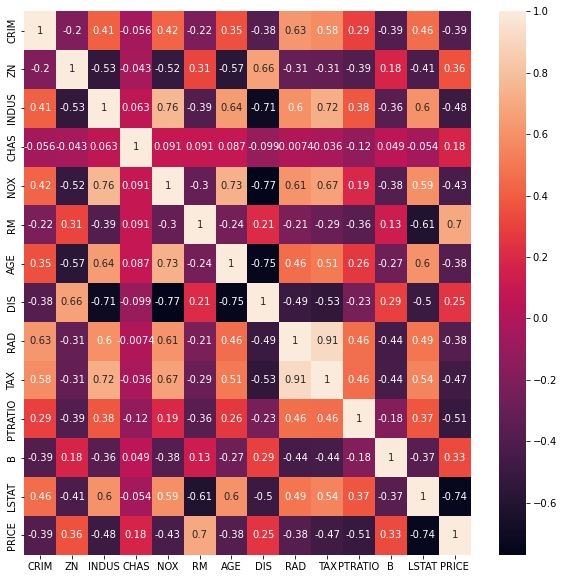

In [5]:
import seaborn as sns

plt.figure(figsize =(10,10))

sns.heatmap(house_df.corr(), annot=True)

In [6]:
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

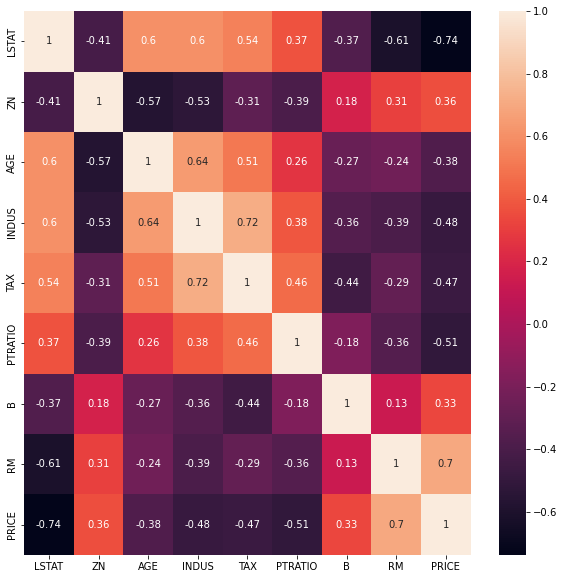

In [7]:
impo_df=house_df[['LSTAT','ZN','AGE','INDUS','TAX','PTRATIO','B','RM','PRICE']]
plt.figure(figsize =(10,10))

sns.heatmap(impo_df.corr(), annot=True)

In [8]:
house_df.corr().apply(abs).sort_values('PRICE',axis=0,ascending=False).index


Index(['PRICE', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD',
       'AGE', 'ZN', 'B', 'DIS', 'CHAS'],
      dtype='object')

In [9]:
lis=house_df.corr().apply(abs).sort_values('PRICE',axis=0,ascending=False).index[1:9]

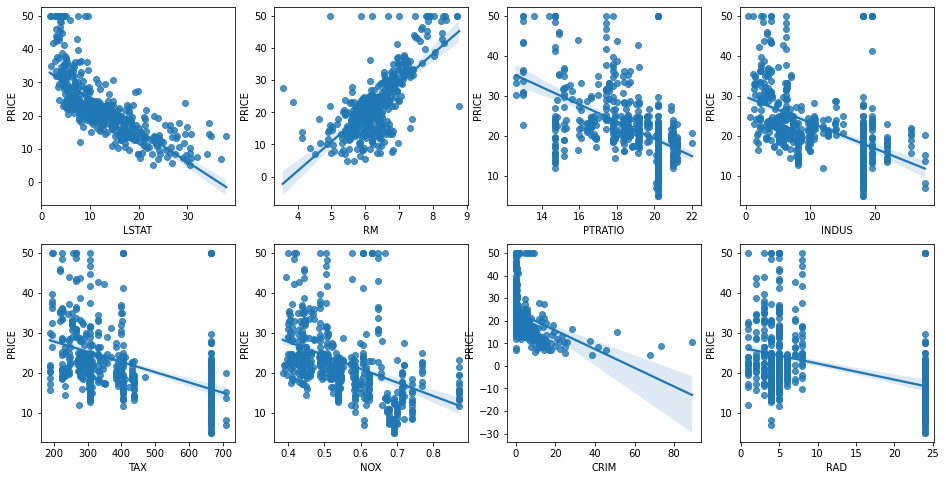

In [10]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
for i,feature in enumerate(lis):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=house_df , ax=axs[row][col])


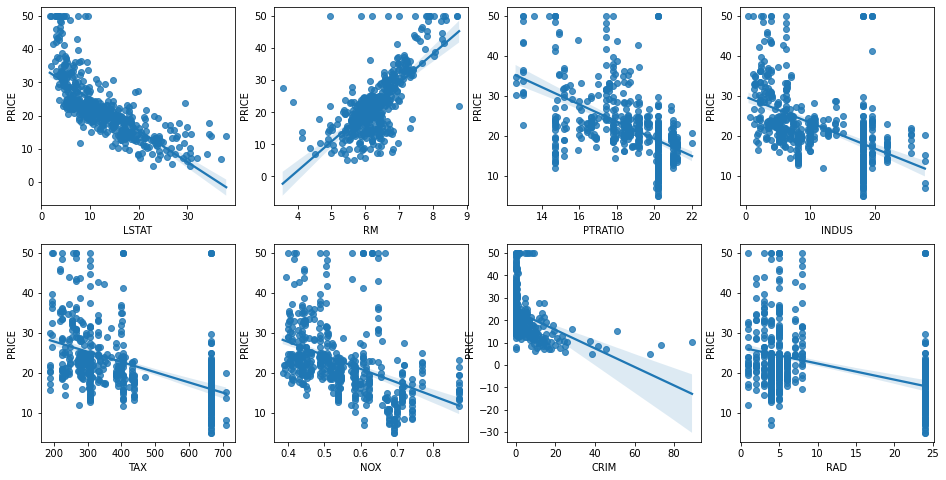

In [11]:
# 상관관계 높은 8개 항목만 regplot
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=house_df , ax=axs[row][col])


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

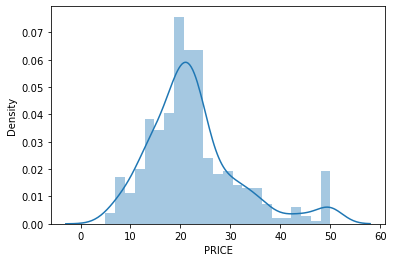

In [12]:
sns.distplot(house_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

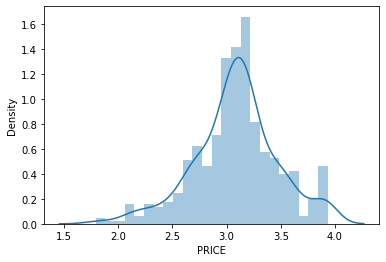

In [13]:
y_log = np.log1p(house_df['PRICE'])
sns.distplot(y_log)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

x = house_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']]
y = house_df['PRICE']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)


print(f'MSE = {np.round(mse,4)}, RMSE= {np.round(rmse,4)}, R2_Score={np.round(r2,4)}')
print(f'절편값 : {np.round(lr_clf.intercept_,4)}')
print(f'회귀계수값 : {np.round(lr_clf.coef_,2)}')

MSE = 24.3526, RMSE= 4.9348, R2_Score=0.7343
절편값 : 35.8497
회귀계수값 : [-5.700e-01  3.340e+00 -1.140e+00  1.600e-01 -1.000e-02 -1.032e+01
 -8.000e-02  2.900e-01]


과제_0926_1
- 상기 내용에 대하여 교차검증을 수행하여 평가 결과를 출력하세요.(cv=5)

In [15]:
neg_mse_scores = cross_val_score(lr_clf,x, y, scoring='neg_mean_squared_error',cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))

print(f'5fold negative MSE = {np.round(neg_mse_scores,4)}, \n 평균 RMSE = {np.round(avg_rmse,4)}')

5fold negative MSE = [-11.6419 -26.5068 -34.9871 -82.7982 -41.2652], 
 평균 RMSE = 5.9997


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


In [17]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x,y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'개별 RMSE scores: {np.round(rmse_scores,4)}')
print(f'평균 RMSE score : {np.round(avg_rmse,4)}')

개별 RMSE scores: [3.3111 5.2794 5.8981 8.7076 6.2372]
평균 RMSE score : 5.8867


In [19]:
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, x,y, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {alpha}일 때, 평균 RMSE : {np.round(avg_rmse,4)}')

alpha 0일 때, 평균 RMSE : 5.9997
alpha 0.1일 때, 평균 RMSE : 5.9939
alpha 1일 때, 평균 RMSE : 5.961
alpha 10일 때, 평균 RMSE : 5.8867
alpha 100일 때, 평균 RMSE : 5.7832


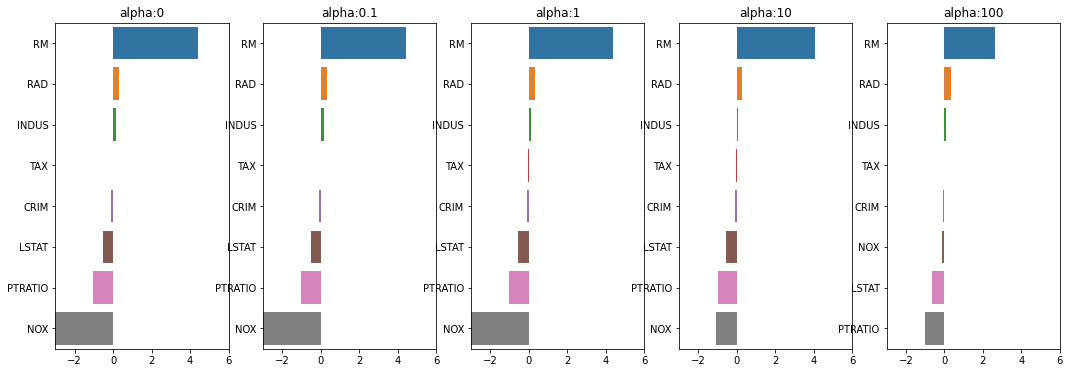

In [24]:
# alpha값이 증가하며 회귀계수는 지속적으로 작아짐
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(18,6), nrows = 1, ncols=5)
coeff_df = pd.DataFrame()

for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x,y)
    
    coeff = pd.Series(data = ridge.coef_ ,index = x.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [30]:
# 라쏘 회귀
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, x_data_n = None, y_target_n=None, return_coeff=True, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha {param}일 때, 5폴드 세트의 평균 RMSE : {np.round(avg_rmse,3)}')

        model.fit(x_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=x_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [31]:
lasso_alphas = [ 0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n = x, y_target_n = y)

###### Lasso ######
alpha 0.07일 때, 5폴드 세트의 평균 RMSE : 5.923
alpha 0.1일 때, 5폴드 세트의 평균 RMSE : 5.926
alpha 0.5일 때, 5폴드 세트의 평균 RMSE : 6.018
alpha 1일 때, 5폴드 세트의 평균 RMSE : 6.11
alpha 3일 때, 5폴드 세트의 평균 RMSE : 6.298


In [32]:
coeff_lasso_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
LSTAT,-0.564817,-0.569279,-0.628763,-0.707365,-0.781357
RM,4.156482,4.065615,2.854042,1.345075,0.000000
PTRATIO,-0.957087,-0.953993,-0.912739,-0.862747,-0.369053
INDUS,0.082966,0.079774,0.037217,0.000000,-0.000000
TAX,-0.014680,-0.014556,-0.012904,-0.011398,-0.006873
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
CRIM,-0.093349,-0.092339,-0.078867,-0.061571,-0.000000
RAD,0.280734,0.278918,0.254716,0.228512,0.034140


In [34]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정

elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n=x,y_target_n=y)

###### ElasticNet ######
alpha 0.07일 때, 5폴드 세트의 평균 RMSE : 5.887
alpha 0.1일 때, 5폴드 세트의 평균 RMSE : 5.878
alpha 0.5일 때, 5폴드 세트의 평균 RMSE : 5.876
alpha 1일 때, 5폴드 세트의 평균 RMSE : 5.967
alpha 3일 때, 5폴드 세트의 평균 RMSE : 6.204


In [35]:
coeff_elastic_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
LSTAT,-0.578220,-0.587369,-0.669934,-0.719498,-0.772564
RM,3.934760,3.766821,2.197464,1.144636,0.000000
PTRATIO,-0.972313,-0.974541,-0.960931,-0.890172,-0.509463
INDUS,0.083205,0.080209,0.043904,0.003924,-0.000000
TAX,-0.014920,-0.014888,-0.014059,-0.012513,-0.009650
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
CRIM,-0.093767,-0.092948,-0.082549,-0.070419,-0.023211
RAD,0.288681,0.289782,0.286569,0.259357,0.120570


과제_0927_1
- 엘라스틱넷 모델을적용하여 모델링 및 평가를 수행하세요
- alpha 값 및 l1,l2 규제 비중 variation을 통하여 회귀계수의 변화를 설명하세요.

In [38]:
def get_linear_reg_el_eval(model_name, params=None, l1_ratios = None, x_data_n = None, y_target_n=None, return_coeff=True, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params:
        for l1_ratio in l1_ratios:
            if model_name == 'Ridge': model = Ridge(alpha=param)
            elif model_name == 'Lasso' : model = Lasso(alpha=param)
            elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio= l1_ratio)
            neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
            avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
            print(f'alpha {param}이고 l1_ratio가 {l1_ratio}일 때, 5폴드 세트의 평균 RMSE : {np.round(avg_rmse,3)}')

            model.fit(x_data_n, y_target_n)
            if return_coeff:
                coeff = pd.Series(data=model.coef_, index=x_data_n.columns)
                colname='alpha:'+str(param)
                coeff_df[colname] = coeff
    return coeff_df

In [40]:
elastic_alphas = [0.07,0.1,0.5,1,3]
l1_ratios = [0, 0.1, 0.5, 0.7, 1]
coeff_elastic_df = get_linear_reg_el_eval('ElasticNet', params=elastic_alphas, l1_ratios = l1_ratios, x_data_n=x,y_target_n=y)

# l1_ratio가 높아질수록 RMSE가 높아진다. 즉 L1규제에 가까워질수록 오차가 커진다는 것을 알 수 있다.

###### ElasticNet ######
alpha 0.07이고 l1_ratio가 0일 때, 5폴드 세트의 평균 RMSE : 5.834
alpha 0.07이고 l1_ratio가 0.1일 때, 5폴드 세트의 평균 RMSE : 5.84
alpha 0.07이고 l1_ratio가 0.5일 때, 5폴드 세트의 평균 RMSE : 5.869
alpha 0.07이고 l1_ratio가 0.7일 때, 5폴드 세트의 평균 RMSE : 5.887
alpha 0.07이고 l1_ratio가 1일 때, 5폴드 세트의 평균 RMSE : 5.923
alpha 0.1이고 l1_ratio가 0일 때, 5폴드 세트의 평균 RMSE : 5.814
alpha 0.1이고 l1_ratio가 0.1일 때, 5폴드 세트의 평균 RMSE : 5.821
alpha 0.1이고 l1_ratio가 0.5일 때, 5폴드 세트의 평균 RMSE : 5.854
alpha 0.1이고 l1_ratio가 0.7일 때, 5폴드 세트의 평균 RMSE : 5.878
alpha 0.1이고 l1_ratio가 1일 때, 5폴드 세트의 평균 RMSE : 5.926
alpha 0.5이고 l1_ratio가 0일 때, 5폴드 세트의 평균 RMSE : 5.798
alpha 0.5이고 l1_ratio가 0.1일 때, 5폴드 세트의 평균 RMSE : 5.803
alpha 0.5이고 l1_ratio가 0.5일 때, 5폴드 세트의 평균 RMSE : 5.838
alpha 0.5이고 l1_ratio가 0.7일 때, 5폴드 세트의 평균 RMSE : 5.876
alpha 0.5이고 l1_ratio가 1일 때, 5폴드 세트의 평균 RMSE : 6.018
alpha 1이고 l1_ratio가 0일 때, 5폴드 세트의 평균 RMSE : 5.851
alpha 1이고 l1_ratio가 0.1일 때, 5폴드 세트의 평균 RMSE : 5.86
alpha 1이고 l1_ratio가 0.5일 때, 5폴드 세트의 평균 RMSE : 5.913
alpha 1이고 l1_ratio가 

In [41]:
coeff_elastic_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
LSTAT,-0.564817,-0.569279,-0.628763,-0.707365,-0.781357
RM,4.156482,4.065615,2.854042,1.345075,0.000000
PTRATIO,-0.957087,-0.953993,-0.912739,-0.862747,-0.369053
INDUS,0.082966,0.079774,0.037217,0.000000,-0.000000
TAX,-0.014680,-0.014556,-0.012904,-0.011398,-0.006873
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
CRIM,-0.093349,-0.092339,-0.078867,-0.061571,-0.000000
RAD,0.280734,0.278918,0.254716,0.228512,0.034140
